# Loading in Our Data

In [1]:
import os
import numpy as np 
from pymatreader import read_mat
import pandas as pd

In [2]:
path = "/Users/wendytran/Documents/GitHub/BrainTumorClassification/"

In [3]:
folders = ["brainTumorDataPublic_15332298/", "brainTumorDataPublic_22993064/", "brainTumorDataPublic_7671532/", "brainTumorDataPublic_1766/"]

In [4]:
def load_mat_files(path, folders):
    """
    Loads in mat_files of brain MRI images from a list of folders as a dataframe 
    """
    # create the empty df to store data in 
    df = pd.DataFrame(columns=["label", "PID","image", "tumorBorder", "tumorMask"])
    # for each folder
    for folder in folders:
        # get the path to that particular folder
        path_to_folder = path + folder
        
        # get each file in that folder
        for filename in os.listdir(path_to_folder):
            # load in mat file 
            data = read_mat(os.path.join(folder, filename))
            # add to df
            df.loc[len(df.index)] = [data["cjdata"]["label"], data["cjdata"]["PID"], data["cjdata"]["image"],
                                     data["cjdata"]["tumorBorder"], data["cjdata"]["tumorMask"]] 
            
    return df

In [5]:
mri_df = load_mat_files(path, folders)

In [6]:
mri_df

,label,PID,image,tumorBorder,tumorMask
0,2.0,MR049453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[354.72671748177135, 178.05890132418324, 343.5...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,2.0,MR049358,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[212.60855095131663, 187.5579966096207, 211.96...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2.0,MR024780G,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[334.3524479862588, 173.78771307760346, 316.09...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,2.0,MR040240B,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[315.7630662020906, 210.50871080139373, 306.84...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2.0,MR040240B,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[283.90628253922023, 208.11229760793518, 274.2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
3059,1.0,103925,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[299.32672685780057, 287.7354868655851, 291.82...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3060,1.0,103673,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[260.74603070212373, 191.177236796305, 255.268...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3061,1.0,106592,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[298.51738658178874, 261.1443178391548, 292.91...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3062,1.0,106284,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[194.3964651087294, 94.55538030968408, 182.063...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


https://figshare.com/articles/dataset/brain_tumor_dataset/1512427

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

- `cjdata.label`: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
- `cjdata.PID`: patient ID
- `cjdata.image`: image data
- `cjdata.tumorBorder`: a vector storing the coordinates of discrete points on tumor border.
    - For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border. It was generated by manually delineating the tumor border. So we can use it to generate binary image of tumor mask.
- `cjdata.tumorMask`: a binary image with 1s indicating tumor region

-----
This data was used in the following paper:
1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).
2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on github 
https://github.com/chengjun583/brainTumorRetrieval

-----
Jun Cheng
School of Biomedical Engineering
Southern Medical University, Guangzhou, China
Email: chengjun583@qq.com

In [7]:
label_encoder = {
    1.0: "Meningioma Tumor",
    2.0: "Glioma Tumor",
    3.0: "Pituitary Tumor"
}

Text(0.5, 0.98, 'Label: Glioma Tumor')

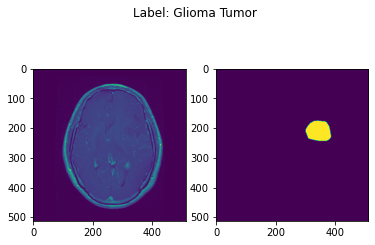

In [20]:
# /Users/wendytran/Documents/GitHub/BrainTumorClassification/

from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data["image"])
ax[1].imshow(data["tumorMask"])
fig.suptitle("Label: " + label_encoder[data["label"]])

# Training Set vs Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

# take a random 30% of data
np.random.seed(1234)
train, test = train_test_split(mri_df, test_size = 0.3) # hold out 30% of data
train.shape, test.shape

In [21]:
train

,label,PID,image,tumorBorder,tumorMask
216,3.0,97890,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[197.23111174267632, 310.49254224837165, 192.5...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2648,1.0,104281,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[354.25345818888695, 265.3558922660153, 341.55...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
79,3.0,103837,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[189.99303135888502, 239.94425087108013, 186.4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2462,1.0,106914,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[350.5828984230235, 260.74603070212373, 340.17...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
834,2.0,MR026175E,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[326.04199363106835, 206.12751039656487, 344.8...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
2041,3.0,111125,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[238.25346258536, 205.47362377328028, 241.4514...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
664,2.0,MR038469,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[204.05168530929586, 288.8754963535671, 201.67...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1318,2.0,MR024780G,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[307.73519163763063, 160.5574912891986, 303.27...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
723,3.0,103837,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[172.3799916630991, 263.1063030647302, 173.957...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Exploratory Analysis

Brain MRI images are given in 3 different planes: axial, sagittal and coronal.

""


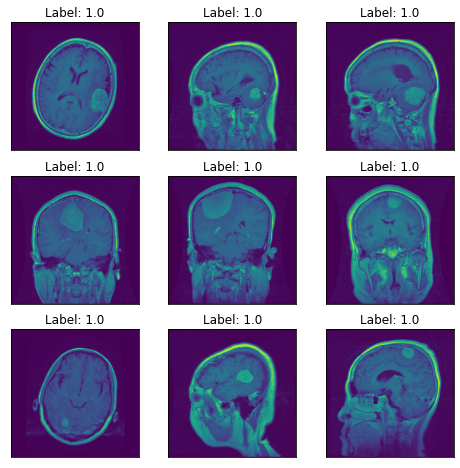

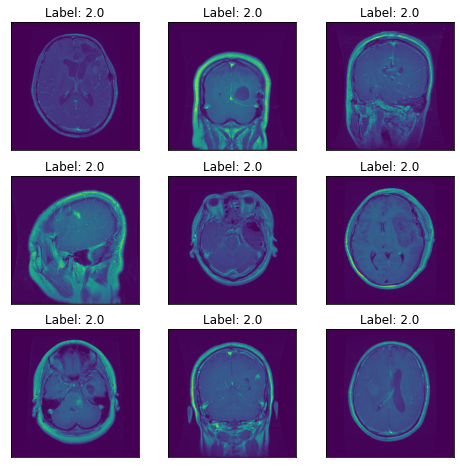

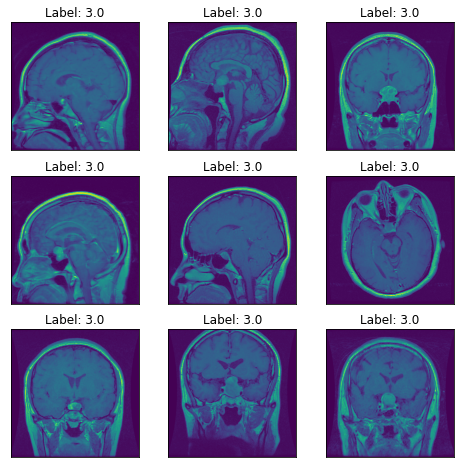

In [39]:
def plot(df):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(df.iloc[i]["image"])
        plt.title("Label: " + str(df.iloc[0]["label"]))

train.groupby(["label"]).apply(plot)

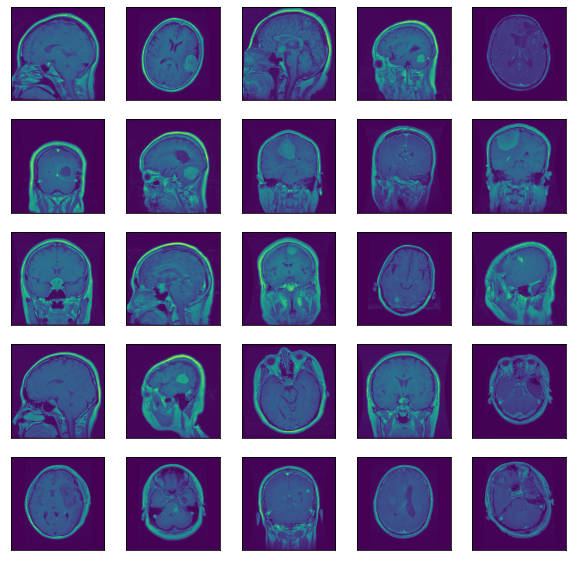

In [51]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train.iloc[i]["image"])

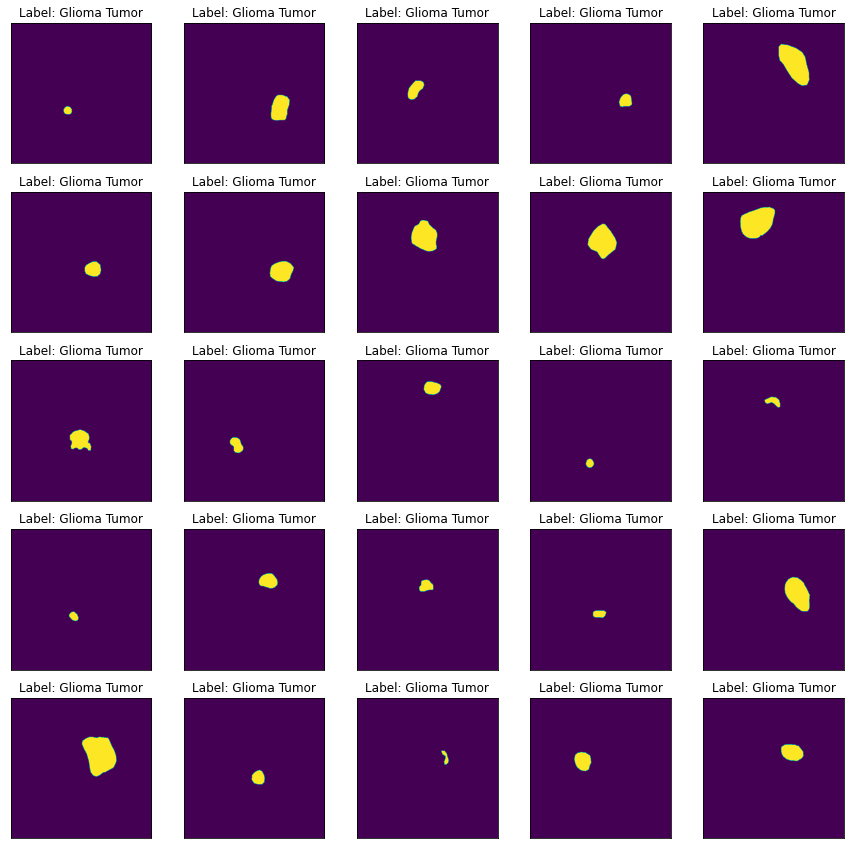

In [27]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train.iloc[i]["tumorMask"])
    plt.title("Label: " + label_encoder[data["label"]])

# Data Cleaning

In [52]:
from sklearn import preprocessing 

def prep_mri_data(data_df):
    df = data_df.copy()
    
    # don't need patient ID
    df = df.drop(["PID"], axis = 1) # axis=1 allows us to drop the column rather than row
    
    # split into predictor (X) and target(Y)
    X = df[["image"]]
    y = df[["label", "tumorMask"]]
    
    return (X, y)

In [53]:
X_train, y_train = prep_mri_data(train)
X_test, y_test = prep_mri_data(test)

In [54]:
X_train

,image
216,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2648,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
79,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2462,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
834,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...
2041,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
664,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1318,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
723,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [55]:
y_train

,label,tumorMask
216,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2648,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
79,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2462,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
834,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
2041,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
664,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1318,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
723,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Building Initial Model